# Configuration

In [15]:
import matplotlib.pyplot as plt
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression

## The normal ecuation

In [16]:
import numpy as np

np.random.seed(42)

m = 100 # the number of instances
X = 2 * np.random.rand(m , 1) # column vector
y = 4 + 3 * X + np.random.rand(m, 1) # column vector


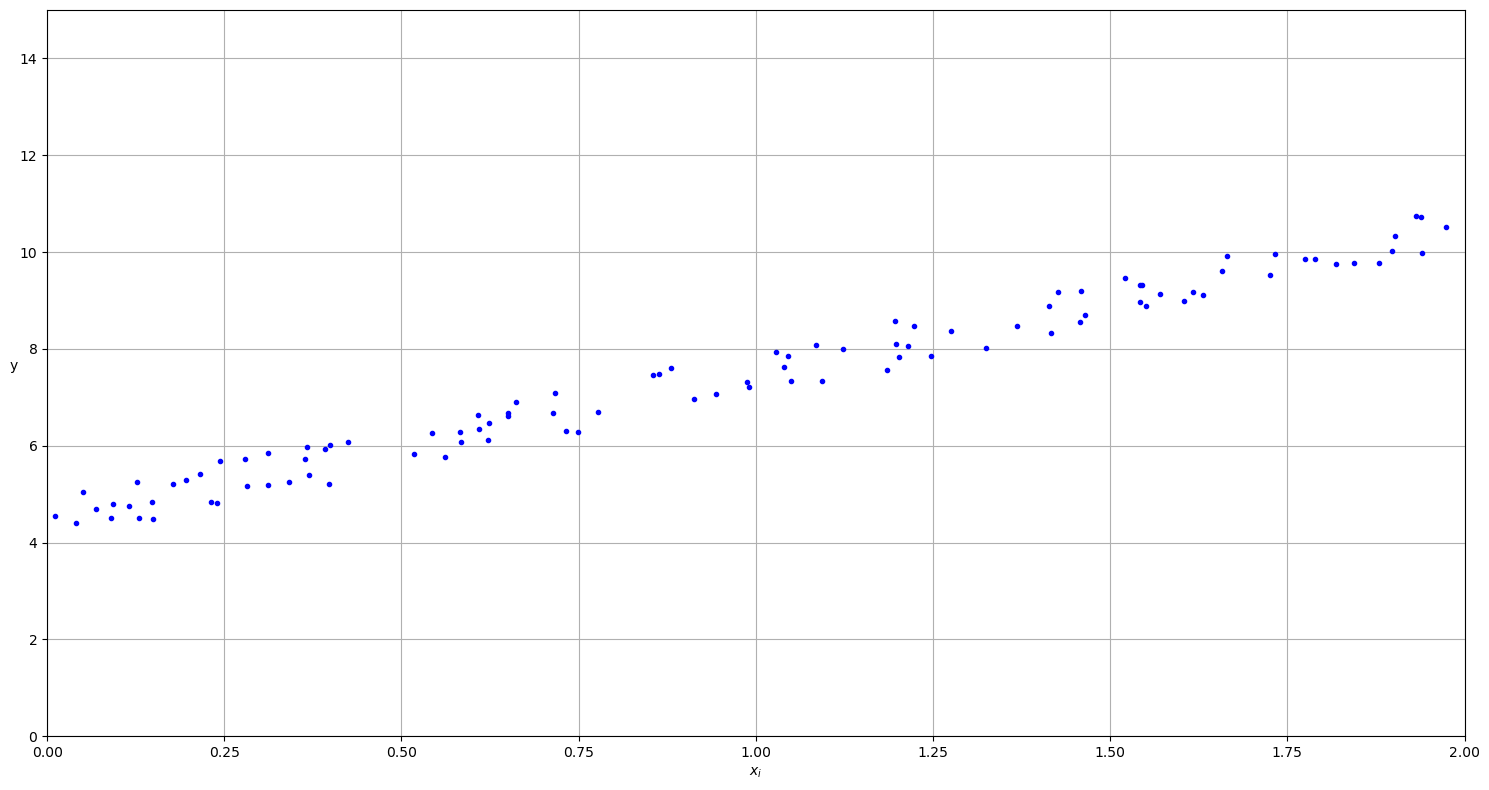

In [17]:
plt.figure(figsize = (15, 8))
plt.plot(X, y, "b.")
plt.ylabel("y", rotation = 0)
plt.xlabel("$x_i$")
plt.axis([0, 2., 0, 15])
plt.grid()
save_fig("generated_data")
plt.show()

In [18]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x_0 = 1 to each instances
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [19]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [20]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new) 
y_pred = X_new_b @ theta_best
y_pred

array([[ 4.51359766],
       [10.48006601]])

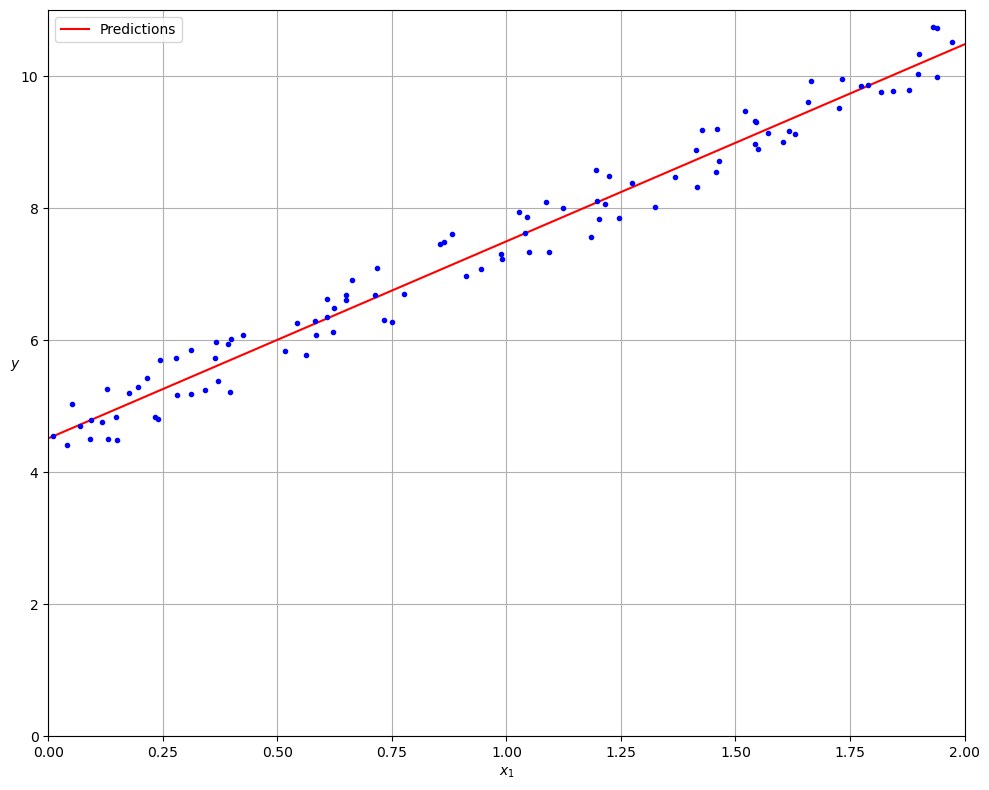

In [21]:
plt.figure(figsize = (10, 8))

plt.plot(X_new, y_pred, 'r-', label = 'Predictions')
plt.plot(X, y, 'b.')
plt.axis([0, 2., 0, 11.])
plt.ylabel("$y$", rotation = 0)
plt.xlabel("$x_1$")
plt.grid()
plt.legend()
save_fig("linear_model_predictions")
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [23]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [24]:
theta_best_svd, residual, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6) # linear algebra "least squared" method
theta_best_svd

array([[4.51359766],
       [2.98323418]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [25]:
np.linalg.pinv(X_b) @ y

array([[4.51359766],
       [2.98323418]])

# Gradient Descent

## Batch Gradient Descent 

In [26]:
eta = 0.01 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1) # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [27]:
theta

array([[4.48995432],
       [3.00410996]])

In [28]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

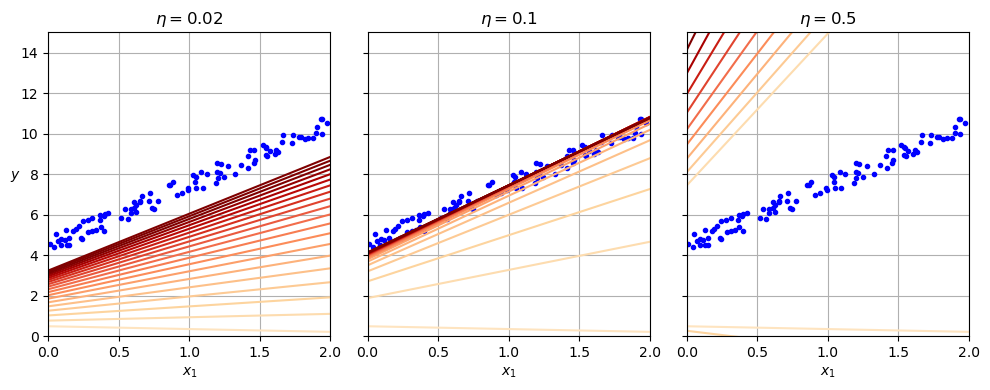

In [29]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent")
plt.show()

## Stochastic Gradient Descent

In [42]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, don't divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [48]:
theta

array([[4.51548062],
       [2.9775157 ]])

In [46]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #              parameter space to plot the next figure

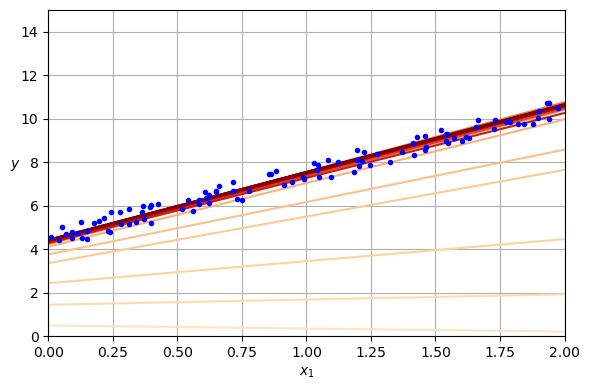

In [47]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.show()